In [40]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. For this, we will use the "Bee or Wasp?" dataset that was obtained from [Kaggle](https://www.kaggle.com/datasets/jerzydziewierz/bee-vs-wasp) and slightly rebuilt.

You can download the dataset for this homework from [here](https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip) or use the commands in this notebook.

In [2]:
# !wget -c https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
# !unzip data.zip 

## Data Preparation

- The dataset contains around 2500 images of bees and around 2100 images of wasps.
- The dataset contains separate folders for training and test sets.



## Model

The architecture of the model required for this section can be found in text form in the homework-file.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

print(tf.__version__)
print("GPUs: ", len(tf.config.list_physical_devices('GPU')))

2023-11-17 15:19:58.717372: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 15:19:58.717396: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 15:19:58.717415: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 15:19:58.723164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.14.0
GPUs:  1


2023-11-17 15:19:59.892314: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-17 15:19:59.896058: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-17 15:19:59.896201: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [41]:
model = Sequential([    
    keras.Input(shape=(150, 150, 3)),
    keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3), 
        activation="relu"), 
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid")
])

optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

**Answer**: `binary crossentropy`

### Question 2


What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

**Answer**: `896`

## Generators and Training

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_dir = "./data/train/"
test_dir  = "./data/test/"

In [9]:
batch_size = 20

train_gen = ImageDataGenerator(rescale=1.0/255.0)
val_gen   = ImageDataGenerator(rescale=1.0/255.0)


train_ds = train_gen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=batch_size,
    shuffle=True,
    class_mode="binary"
)

val_ds = val_gen.flow_from_directory(
    test_dir, 
    target_size=(150, 150), 
    batch_size=batch_size,
    shuffle=True,
    class_mode="binary"
)

Found 3677 images belonging to 2 classes.


Found 918 images belonging to 2 classes.


In [10]:
n_epochs = 10

history = model.fit(
    train_ds,
    epochs=n_epochs,
    validation_data=val_ds
)

Epoch 1/10


2023-11-17 15:20:41.129703: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-17 15:20:41.749607: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f75f85599c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-17 15:20:41.749627: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-11-17 15:20:41.793562: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-11-17 15:20:41.944996: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 422.21MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-17 15:20:41.945210: W tensorflow/tsl/fram

184/184 [==============================] - 7s 33ms/step - loss: 0.6775 - accuracy: 0.5640 - val_loss: 0.7017 - val_accuracy: 0.5370
Epoch 2/10
184/184 [==============================] - 6s 33ms/step - loss: 0.6302 - accuracy: 0.6443 - val_loss: 0.6127 - val_accuracy: 0.6002
Epoch 3/10
184/184 [==============================] - 6s 34ms/step - loss: 0.5697 - accuracy: 0.7079 - val_loss: 0.6316 - val_accuracy: 0.5904
Epoch 4/10
184/184 [==============================] - 6s 33ms/step - loss: 0.5344 - accuracy: 0.7381 - val_loss: 0.5524 - val_accuracy: 0.7462
Epoch 5/10
184/184 [==============================] - 6s 33ms/step - loss: 0.5119 - accuracy: 0.7588 - val_loss: 0.5380 - val_accuracy: 0.7244
Epoch 6/10
184/184 [==============================] - 6s 33ms/step - loss: 0.4891 - accuracy: 0.7737 - val_loss: 0.5214 - val_accuracy: 0.7582
Epoch 7/10
184/184 [==============================] - 6s 33ms/step - loss: 0.4685 - accuracy: 0.7909 - val_loss: 0.5062 - val_accuracy: 0.7593
Epoch 8/10

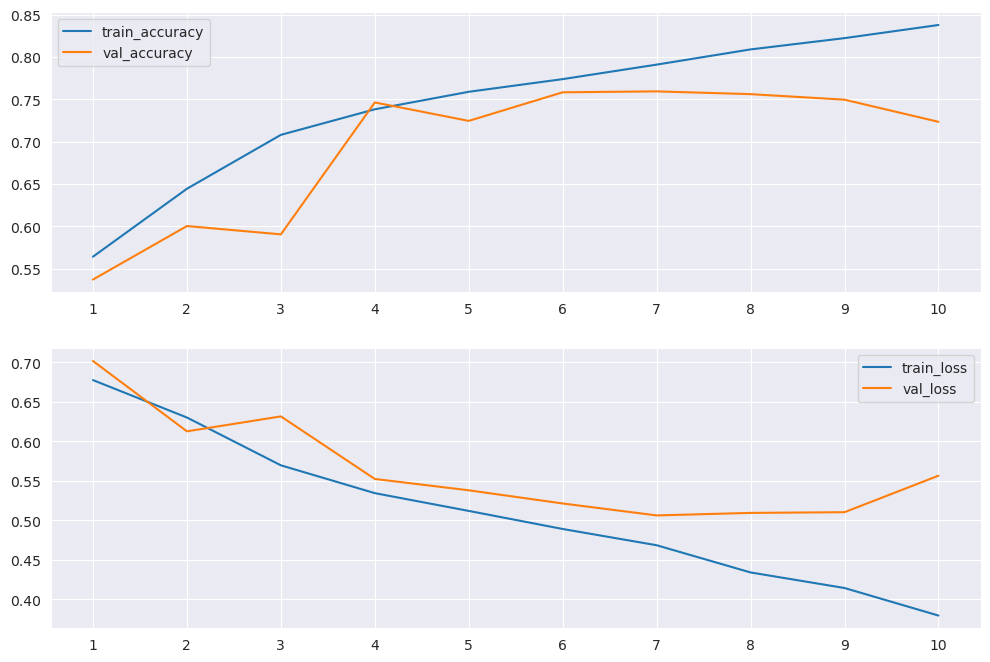

In [13]:
hist = history.history

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

epochs = np.arange(1, n_epochs + 1)

ax[0].plot(epochs, hist["accuracy"], label="train_accuracy")
ax[0].plot(epochs, hist["val_accuracy"], label="val_accuracy")
ax[0].set_xticks(epochs)
ax[0].legend()
ax[1].plot(epochs, hist["loss"], label="train_loss")
ax[1].plot(epochs, hist["val_loss"], label="val_loss")
ax[1].set_xticks(epochs)
ax[1].legend()
plt.show()

In [15]:
np.median(hist["accuracy"]).round(2)

0.77

**Answer**: `0.80` (nearest value)

## Question 4

What is the standard deviation of training loss for all the epochs for this model?

In [16]:
np.std(np.array(hist["loss"])).round(2)

0.09

**Answer**: `0.091` (nearest value)

# Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [24]:
batch_size = 20

train_gen = ImageDataGenerator(
    rescale=1.0/255.0, 
    # Data Augmentation
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=batch_size,
    shuffle=True,
    class_mode="binary"
)

val_gen = ImageDataGenerator(rescale=1.0/255.0)

val_ds = val_gen.flow_from_directory(
    test_dir, 
    target_size=(150, 150), 
    batch_size=batch_size,
    shuffle=True,
    class_mode="binary"
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


### Question 5

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?


In [19]:
from keras.models import clone_model

In [22]:
# save copy of old model, just in case
model_backup = clone_model(model)
model_backup.set_weights(model.get_weights())


In [25]:
n_epochs = 10

history = model.fit(
    train_ds,
    epochs=n_epochs,
    validation_data=val_ds
)

Epoch 1/10
184/184 [==============================] - 17s 94ms/step - loss: 0.4968 - accuracy: 0.7667 - val_loss: 0.4775 - val_accuracy: 0.7789
Epoch 2/10
184/184 [==============================] - 17s 93ms/step - loss: 0.4898 - accuracy: 0.7707 - val_loss: 0.4963 - val_accuracy: 0.7549
Epoch 3/10
184/184 [==============================] - 17s 92ms/step - loss: 0.4824 - accuracy: 0.7789 - val_loss: 0.5261 - val_accuracy: 0.7549
Epoch 4/10
184/184 [==============================] - 17s 92ms/step - loss: 0.4786 - accuracy: 0.7729 - val_loss: 0.4629 - val_accuracy: 0.7821
Epoch 5/10
184/184 [==============================] - 17s 93ms/step - loss: 0.4766 - accuracy: 0.7762 - val_loss: 0.4785 - val_accuracy: 0.7723
Epoch 6/10
184/184 [==============================] - 17s 90ms/step - loss: 0.4676 - accuracy: 0.7895 - val_loss: 0.4651 - val_accuracy: 0.7800
Epoch 7/10
184/184 [==============================] - 16s 88ms/step - loss: 0.4724 - accuracy: 0.7854 - val_loss: 0.4768 - val_accuracy:

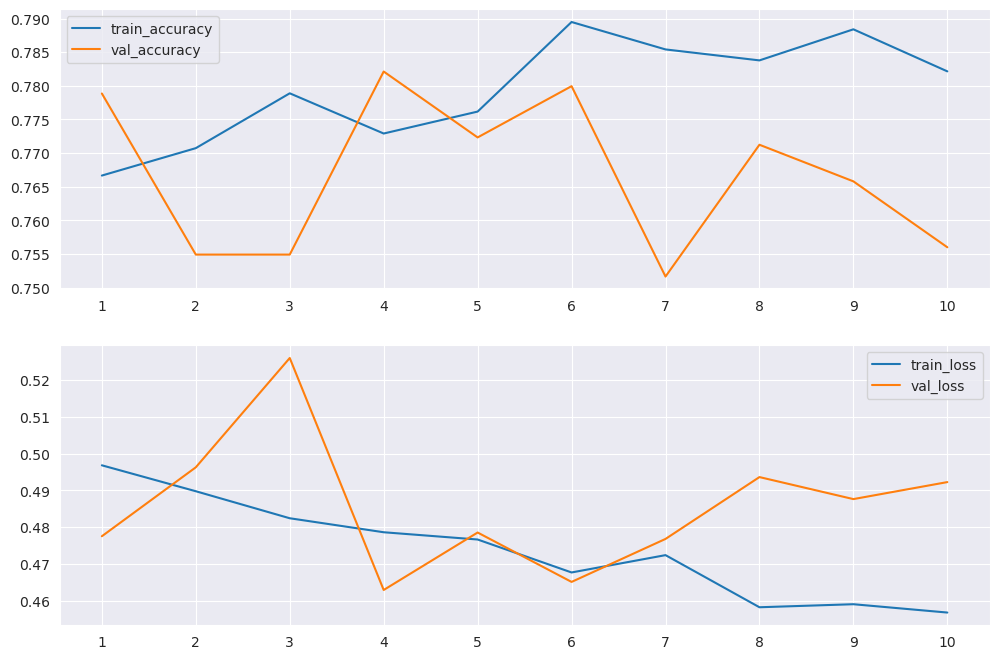

In [27]:
hist = history.history

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

epochs = np.arange(1, n_epochs + 1)

ax[0].plot(epochs, hist["accuracy"], label="train_accuracy")
ax[0].plot(epochs, hist["val_accuracy"], label="val_accuracy")
ax[0].set_xticks(epochs)
ax[0].legend()
ax[1].plot(epochs, hist["loss"], label="train_loss")
ax[1].plot(epochs, hist["val_loss"], label="val_loss")
ax[1].set_xticks(epochs)
ax[1].legend()
plt.show()

In [39]:
np.mean(hist["val_loss"]).round(2)

0.49

**Answer**: `0.48` (nearest value)

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [44]:
np.mean(hist["val_accuracy"][5:]).round(2)

0.76

**Answer**: `0.78` (nearest value)